# Preamble

Title: *GINI x Education*

Author: *Dakota M. Miller*

Email: *dmil166 @ msudenver.edu*

Last Update: *2021-10-07*


# Introduction

The goal of this notebook is to analyze if there is a relationship between a country's Global Inequality Index (GINI) and the Education Index (combining average years of schooling for adults with expected years of schooling for children).

# Dataset

The dataset for this report consists of a collection of 40 attributes from 264 countries. This study focuses on two attributes: gini and edu_index.

1. "In economics, the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) (/ˈdʒiːni/ JEE-nee), also the Gini index and the Gini ratio, is a measure of statistical dispersion intended to represent the income inequality or the wealth inequality within a nation or a social group. The Gini coefficient was developed by the statistician and sociologist Corrado Gini.

<a/>

* The Gini coefficient measures the inequality among values of a frequency distribution (for example, levels of income).
    * A Gini coefficient of zero expresses perfect equality, where all values are the same (for example, where everyone has the same income).
    * A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g., for a large number of people where only one person has all the income or consumption and all others have none, the Gini coefficient will be nearly one)."

Sample of the Gini data used:
```
[
country, gini
Abkhazia, N/A,
Adorra, N/A,
Afghanistan, N/A,
Albania, 29,
Algeria, 27.6,
…
…
Zambia, 57.1
Zimbabwe, 43.2
]
```


2. "An [Education index](https://en.wikipedia.org/wiki/Education_Index) is a component of the Human Development Index published every year by the United Nations Development Programme. Alongside the GDP Index and Life Expectancy Index, it helps measure the educational attainment, GDP per capita and life expectancy of countries.

<a/>

* Since 2010, the education index has been measured by combining average adult years of schooling with expected years of schooling for students under the age of 25, each receiving 50% weighting.
* Before 2010, the education index was measured by the adult literacy rate (with two-thirds weighting) and the combined primary, secondary, and tertiary gross enrollment ratio (with one-third weighting)."

Sample of the Education Index data used:
```
[
country, edu_index
Abkhazia, N/A,
Adorra, N/A,
Afghanistan, 0.415,
Albania, 0.745,
…
…
Zambia, 0.58
Zimbabwe, 0.558
]
```

### Library Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Definitions/Parameters

In [29]:
import os
os.chdir(globals()['_dh'][0])
os.chdir('../')
DATA_FOLDER = os.path.join(os.getcwd(), 'data')
CSV_FILE_NAME = 'country_indicators.csv'
CSV_FILE_PATH = os.path.join(DATA_FOLDER, CSV_FILE_NAME)

CS390Z - Introduction to Data Mining - Fall 2021

Student: Dakota M. Miller

Description: Linear Regression

*** Correlation Matrix ***
           edu_index    gini
edu_index     1.0000 -0.3715
gini         -0.3715  1.0000
r2 score: 0.14


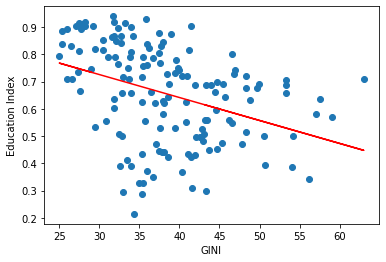

In [30]:
if __name__ == "__main__":
    # TODO: create a pandas data frame from the CSV file
    df = pd.read_csv(CSV_FILE_PATH)

    # (optional) TODO: define the country as the index for the data frame
    df.index = df['country'].values

    # (optional) TODO: remove all columns except 'gini' and 'edu_index' from the data frame
    columns_to_drop = [column for column in df.columns if column != 'gini' and column != 'edu_index']
    df = df.drop(columns=columns_to_drop)

    # TODO: remove any country (index) that does not have both 'gini' and 'edu_index' values
    countries_to_drop = [country for country in df.index if np.isnan(df.loc[country]['gini'])
                         or np.isnan(df.loc[country]['edu_index'])]
    df = df.drop(index=countries_to_drop)

    # TODO: compute and display the correlation matrix between 'gini' and 'edu_index'
    corr = df.corr()
    print('*** Correlation Matrix ***')
    print(corr)

    # TODO: attempt a linear regression model, displaying the obtained r2 score
    X = df['gini'].values.reshape((-1, 1))
    Y = df['edu_index'].values.reshape((-1, 1))
    model = LinearRegression().fit(X, Y)
    score = model.score(X, Y)
    print('r2 score: {:.2f}'.format(score))

    # TODO: produce a visualization of the data points and the fitted line
    Y_pred = model.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, '-r')
    plt.xlabel('GINI')
    plt.ylabel('Education Index')
    plt.show()

CS390Z - Introduction to Data Mining - Fall 2021

Student: Dakota M. Miller

Description: Decision Tree Regression

*** Correlation Matrix ***
           edu_index    gini
edu_index     1.0000 -0.3715
gini         -0.3715  1.0000
r2 score: 0.72


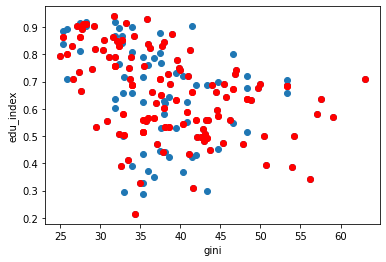

In [31]:
if __name__ == "__main__":

    # TODO: create a pandas data frame from the CSV file
    df = pd.read_csv(CSV_FILE_PATH)

    # (optional) TODO: define the country as the index for the data frame
    df.index = df['country'].values

    # (optional) TODO: remove all columns except 'gini' and 'edu_index' from the data frame
    columns_to_drop = [column for column in df.columns if column != 'gini' and column != 'edu_index']
    df = df.drop(columns=columns_to_drop)

    # TODO: remove any country (index) that does not have both 'gini' and 'edu_index' values
    countries_to_drop = [country for country in df.index if np.isnan(df.loc[country]['gini'])
                         or np.isnan(df.loc[country]['edu_index'])]
    df = df.drop(index=countries_to_drop)

    # TODO: compute and display the correlation matrix between 'gini' and 'edu_index'
    corr = df.corr()
    print('*** Correlation Matrix ***')
    print(corr)

# TODO: attempt a decision tree regression model, displaying the obtained r2 score
    X = df['gini'].values.reshape((-1, 1))
    Y = df['edu_index'].values.reshape((-1, 1))
    model = DecisionTreeRegressor().fit(X, Y)
    score = model.score(X, Y)
    print('r2 score: {:.2f}'.format(score))

# TODO: produce a visualization of the data points and the fitted points
    Y_pred = model.predict(X)
    plt.scatter(X, Y)
    plt.scatter(X, Y_pred, c='red')
    plt.xlabel('gini')
    plt.ylabel('edu_index')
    plt.show()